# Exploratory Data Analysis Project on Superstore Dataset

04/07/2023

Qintong li

---

The dataset contains information about products that has been sold from 2014 to 2017 and their customers info from a superstore in the US.

* Use the Pandas library to perform the 3 essential steps of any EDA using the file named Superstore_dataset.csv:


1. Data Exploration:
- Explore the variables in Excel (use colouring or a whiteboard to identity and group the variables)
- Import your file using the python pandas library and explore the file with key exploration commands


2. Data Cleaning:
- Remove any rows that have missing values from columns that would be an issue to identify (such
as name of a customer, name of a product etc). Replace missing values by zero/mean if justified (give your reasons), remove outliers if necessary.


3. Data Analysis
Answers the following questions (choose an appropriate graph to answer questions):
- How many categories and sub-categories of products there are?
- Which products were sold the most and the least?
- Which products were sold the most in each category and sub-category?
- Which products were sold the most in the different US regions?
- Which States sold the most?
- How many products were sold each year?
- Which products were the most successful each year?
- Which customers ordered the most and what was the total value of their purchases?
- How many customers brought products each year?
- How many customer segments there are in the dataset?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

## 1. Data Exploration:

- Explore the variables in Excel (use colouring or a whiteboard to identity and group the variables)
- Import your file using the python pandas library and explore the file with key exploration commands

In [46]:
df_raw = pd.read_csv('/content/Superstore_dataset.csv',encoding = "ISO-8859-1")

In [3]:
#Data exploration:
df_raw.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,06/09/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,06/09/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,06/09/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,06/09/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,06/09/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [4]:
df_raw.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,NaN,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/03/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,05/04/2017,05/09/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df_raw.shape

(9994, 21)

In [6]:
df_raw.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9982.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,230.078039,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.584508,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.686000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.970000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9988 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9982 non-null   float64
 18  Quantity

## 2. Data Cleaning:
- Remove any rows that have missing values from columns that would be an issue to identify (such
as name of a customer, name of a product etc). Replace missing values by zero/mean if justified (give your reasons), remove outliers if necessary.

According to the information summary, only columns `["Sub_Category"]`, `["Sales"]` has null values.

We can use `isna()` function to select the rows that contains null values and then use `fillna()` to replace the null value.



In [8]:
df_raw[df_raw["Sales"].isna()].index

Int64Index([18, 28, 46, 65, 89, 528, 4279, 5147, 6324, 7855, 8482, 9985], dtype='int64')

In [9]:
df_raw[df_raw["Sub-Category"].isna()].index

Int64Index([20, 30, 51, 55, 77, 102], dtype='int64')

In [10]:
# l_sub_cat = [18, 28, 46, 65, 89, 528, 4279, 5147, 6324, 7855, 8482, 9985]
# l_sales = [20, 30, 51, 55, 77, 102]

In [11]:
df_c_1 = df_raw.fillna(0)

Check whether all cells are available.

In [12]:
df_c_1.info() # df_c_1 is the first cleaned version of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

The datatype of `Order Date` column is not standardized. Therefore, it is better to transfer the datatype to 'datetime' for further analysis.

In [13]:
df_c_1['Order Date'],df_c_1['Ship Date'] = pd.to_datetime(df_c_1['Order Date'],format = '%m/%d/%Y'),pd.to_datetime(df_c_1['Ship Date'],format = '%m/%d/%Y')

In [15]:
# fig = plt.subplots(figsize=(12, 15))

# plt.subplot(321)
# plt.hist(df_c_1['Category'],bins = 7)
# plt.xlabel('Category')
# plt.ylabel('# Orders')

# plt.subplot(323)
# plt.hist(df_c_1['Region'])
# plt.xlabel('Region')
# plt.ylabel('# Orders')

# plt.subplot(325)
# plt.hist(df_c_1['Segment'],bins = 7)
# plt.xlabel('Segment')
# plt.ylabel('# Orders')

# plt.subplot(322)
# plt.bar(df_c_1['Category'].values,df_c_1['Sales'].values)
# plt.xlabel('Category')
# plt.ylabel('# Orders')

# plt.subplot(324)
# plt.bar(df_c_1['Region'].values,df_c_1['Sales'].values)
# plt.xlabel('Region')
# plt.ylabel('Salse/$')

# plt.subplot(326)
# plt.bar(df_c_1['Segment'].values,df_c_1['Sales'].values)
# plt.xlabel('Segment')
# plt.ylabel('Salse/$')

## 3. Data Analysis

### Product Analysis

#### Initial analysis of products

In [16]:
### How many categories and sub-categories of products there are?###
check_df_category = df_c_1.value_counts('Category')
check_df_sub_category = df_c_1.value_counts('Sub-Category')
print('{0} \n \n{1}'.format(check_df_category,check_df_sub_category))

# Sub-category needs cleaning
df_c_2 = df_c_1.drop(index = df_c_1.loc[df_c_1['Sub-Category']==0].index)

# Answer
n_category = len(df_c_2.value_counts('Category'))
n_sub_category = len(df_c_2.value_counts('Sub-Category'))
print('\nNumber of Category is: ', n_category)
print('Number of Sub_Category is: ', n_sub_category)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
dtype: int64 
 
Sub-Category
Binders        1522
Paper          1369
Furnishings     956
Phones          889
Storage         844
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       253
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
0                 6
dtype: int64

Number of Category is:  3
Number of Sub_Category is:  17


In [17]:
### Which products were sold the most and the least? ###

top_product = df_c_2.iloc[df_c_2['Quantity'].idxmax()]['Product Name']
bottom_product = df_c_2.iloc[df_c_2['Quantity'].idxmin()]['Product Name']
print('The product sold the most is: ', top_product)
print('The product sold the least is: ', bottom_product)

The product sold the most is:  Artistic Insta-Plaque
The product sold the least is:  Xerox 232


#### Analysis by categories

In [18]:
# Which products were sold the most in each category and sub-category
Categories_list = df_c_2.value_counts('Category').to_frame().index

for i in Categories_list:
  top_product_per_category = df_c_2.loc[df_c_2.index == df_c_2.loc[df_c_2['Category'] == i]['Quantity'].idxmax()]['Product Name'].values[0]
  print('{0} is sold the most in Category {1}.'.format(top_product_per_category,i))
  print('\n')

OIC Colored Binder Clips, Assorted Sizes is sold the most in Category Office Supplies.


Longer-Life Soft White Bulbs is sold the most in Category Furniture.


Pyle PMP37LED is sold the most in Category Technology.




#### Analysis by region

In [19]:
df_c_2.loc[df_c_2.index ==7666]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7666,7667,US-2016-140158,2016-10-04,2016-10-08,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Providence,...,2908,East,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.91,9,0.0,2591.9568


In [20]:
# Which products were sold the most in the different US regions?
Sub_Categories_list = df_c_2.value_counts('Sub-Category').to_frame().index

for j in Sub_Categories_list:
  top_product_per_sub_category = df_c_2.loc[df_c_2.index == df_c_2.loc[df_c_2['Sub-Category']== j]['Quantity'].idxmax()]['Product Name'].values[0]
  print('{0} is sold the most in Sub_Category {1}.'.format(top_product_per_sub_category,j))
  print('\n')

Cardinal EasyOpen D-Ring Binders is sold the most in Sub_Category Binders.


Personal Creations Ink Jet Cards and Labels is sold the most in Sub_Category Paper.


Longer-Life Soft White Bulbs is sold the most in Sub_Category Furnishings.


Pyle PMP37LED is sold the most in Sub_Category Phones.


Space Solutions Commercial Steel Shelving is sold the most in Sub_Category Storage.


Staples in misc. colors is sold the most in Sub_Category Art.


Anker Ultra-Slim Mini Bluetooth 3.0 Wireless Keyboard is sold the most in Sub_Category Accessories.


Global Stack Chair without Arms, Black is sold the most in Sub_Category Chairs.


Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection is sold the most in Sub_Category Appliances.


Avery 4027 File Folder Labels for Dot Matrix Printers, 5000 Labels per Box, White is sold the most in Sub_Category Labels.


Bevis 36 x 72 Conference Tables is sold the most in Sub_Category Tables.


#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelo

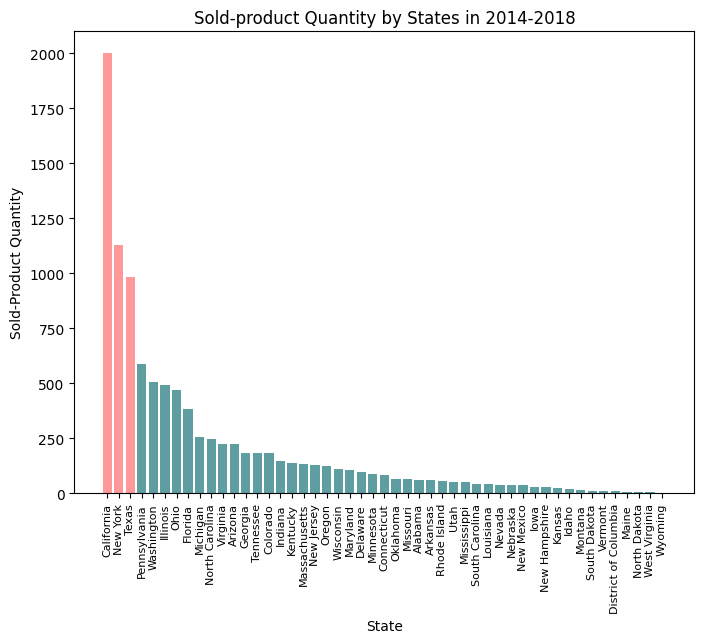

California is the state sold the most.


In [21]:
# Which States sold the most?
fig = plt.subplots(figsize = (8,6))
x = df_c_2.value_counts('State').to_frame().index
y = df_c_2.value_counts('State').to_frame().values.reshape(49,)
plt.bar(x, y, color = np.where(y>750, '#ff9999','cadetblue'))
plt.xticks(rotation = 'vertical',fontsize=8)
plt.xlabel('State')
plt.ylabel('Sold-Product Quantity')
plt.title('Sold-product Quantity by States in 2014-2018')
plt.show()

state_max = x[0]
print('{0} is the state sold the most.'.format(state_max))

#### Analysis by time

In [22]:
# How many products were sold each year?
year_range = pd.DatetimeIndex(df_c_2['Order Date']).year.value_counts().to_frame().index.tolist()
print('Years included in the dataset are:\n',year_range)

for k in year_range:
  number_of_products_per_year = sum(df_c_2.loc[pd.DatetimeIndex(df_c_2['Order Date']).year== k]['Quantity'].values)
  print('\n')
  print('{0} products were sold in {1}'.format(number_of_products_per_year,k))

Years included in the dataset are:
 [2017, 2016, 2015, 2014]


12473 products were sold in 2017


9827 products were sold in 2016


7975 products were sold in 2015


7577 products were sold in 2014


In [42]:
# Which products were the most successful each year?
# if successfull is defined by most sales:
df_c_2['Order Year'] = pd.DatetimeIndex(df_c_2['Order Date']).year
df_sales_product = df_c_2.groupby(['Order Year','Product ID']).sum('Sales')
df_most_success_product = df_sales_product.sort_values(by = 'Sales',ascending = False).head(4)


for n_2 in range(4):
  print('Product with ID {0} were the most successful in {1}.'.format(df_most_success_product.reset_index()['Product ID'].values[n_2],df_most_success_product.reset_index()['Order Year'].values[n_2]))

Product with ID TEC-CO-10004722 were the most successful in 2017
Product with ID TEC-CO-10004722 were the most successful in 2016
Product with ID TEC-MA-10002412 were the most successful in 2014
Product with ID OFF-BI-10003527 were the most successful in 2015


### Customer Analysis

In [45]:
# Which customers ordered the most and what was the total value of their purchases?
df_customer = df_c_2.groupby(['Order Year','Customer ID']).sum('Sales')
df_top_ustomer = df_customer.sort_values(by = 'Sales',ascending = False).head(1)

print('Customer with ID {0} ordered the most and the total value of their purchase was {1}$.'.format(df_top_ustomer.reset_index()['Customer ID'].values[0],df_top_ustomer.reset_index()['Sales'].values[0]))

Customer with ID SM-20320 ordered the most and the total value of their purchase was 23661.228$.


In [25]:
# How many customers brought products each year?
for yr in year_range:
  number_of_customers = len(df_c_2.loc[df_c_2['Order Year']==yr]['Customer ID'].value_counts())
  print('There were {0} customers brought products in {1}'.format(number_of_customers,yr))

There were 693 customers brought products in 2017
There were 638 customers brought products in 2016
There were 573 customers brought products in 2015
There were 595 customers brought products in 2014


In [26]:
# How many customer segments there are in the dataset?
n_segment = len(df_c_2.value_counts('Segment'))
print('Number of customer segment is: ', n_segment)

Number of customer segment is:  3
